# Assignment 2 - SBE 4032 - Advanced Topics in Medical Informatics (2)
Please apply the following:

1. Create a function that performs **LDA** using the *steps described in the tutorial file*, section “LDA general”.\
The function should take *n_components* and the *data matrix* and return the *sorted eigenvalues*, the *sorted eigenvectors* and the *transformed data*.

In [1]:
import numpy as np

def lda_transform(features, target, n_components):
    # Check whether the given components number is acceptable (n_component <= n_classes - 1)
    if (n_components > features.shape[1] - 1):
        raise Exception("Sorry, the given n_components must be less than or equal to (classes number - 1)")
    else:
        # Extract unique target classes and separate features into classes based on target labels
        unique_targets = np.unique(target)
        classes = [features[target == i] for i in unique_targets]

        # Compute each class mean
        classes_means = np.array([np.mean(arr, axis=0) for arr in classes])

        # Compute within-class scatter matrix S_W
        S_W = np.sum([np.dot((arr - mean).T, arr - mean) for arr, mean in zip(classes, classes_means)], axis=0)

        # Compute overall mean
        overall_mean = np.mean(features, axis=0)

        # Compute between-class scatter matrix S_B
        S_B = np.sum([len(arr) * np.outer((mean - overall_mean), (mean - overall_mean)) for arr, mean in zip(classes, classes_means)], axis=0)

        # Calculate the matrix A (LDA transformation matrix)
        A = np.linalg.inv(S_W).dot(S_B)

        # Find sorted eigenvalues and eigenvectors of matrix A
        eigenvalues, eigenvectors = np.linalg.eig(A)
        # Sort eigenvalues and corresponding eigenvectors in descending order
        indices = np.flip(np.argsort(eigenvalues))
        sorted_eigenvalues = eigenvalues[indices]
        sorted_eigenvectors = eigenvectors[:, indices]

        # Transform the data through multiplying it by the selected eigenvectors
        transformed_data = features.dot(sorted_eigenvectors[:, :n_components])

        # Return sorted eigenvalues, sorted eigenvectors, and transformed data
        return sorted_eigenvalues, sorted_eigenvectors, transformed_data

2. Use your function on Iris dataset to reduce its dimensionality to 1 dimension one time and 2 dimensions another time.\
(Please note that LDA can reduce the original number of features to a maximum number of features = n_classes - 1. If the data has 3 classes, its dimensions can be reduced to 1 or 2 dimensions only).

In [2]:
# Importing the iris dataset and spliting it to features and targets/labels/outputs
from sklearn import datasets

features = datasets.load_iris().data
target = datasets.load_iris().target

In [3]:
# Reducing the dimensionality to 1 dimension
eig_values_one, eig_vectors_one, one_dimension = lda_transform(features,target,1)

# Reducing the dimensionality to 2 dimensions
eig_values_two, eig_vectors_two, two_dimension = lda_transform(features,target,2)

3. Plot the original data (a 4x4-plot figure that plots the data features against each other).

In [4]:
import matplotlib.pyplot as plt

def plot_feature_scatter(features, target):
    # Get the number of features
    n = features.shape[1]
    
    # Create a square grid of subplots
    fig, axes = plt.subplots(n, n, figsize=(12, 12))
    
    # Create names for each feature
    feature_names = [f"Feature {i + 1}" for i in range(n)]

    # Iterate through each subplot in the grid
    for i in range(n):
        for j in range(n):
            # Skip diagonal plots (feature against itself)
            if i == j:
                continue
            else:
                # Create a scatter plot for the selected feature pair, color-coded by target
                scatter = axes[i, j].scatter(features[:, i], features[:, j], c=target, cmap='viridis', alpha=0.7)
                axes[i, j].set_xlabel(feature_names[i])
                axes[i, j].set_ylabel(feature_names[j])
                axes[i, j].legend(*scatter.legend_elements(), title='Classes')

    # Adjust layout for better appearance
    plt.tight_layout()
    
    # Display the plot
    plt.show()

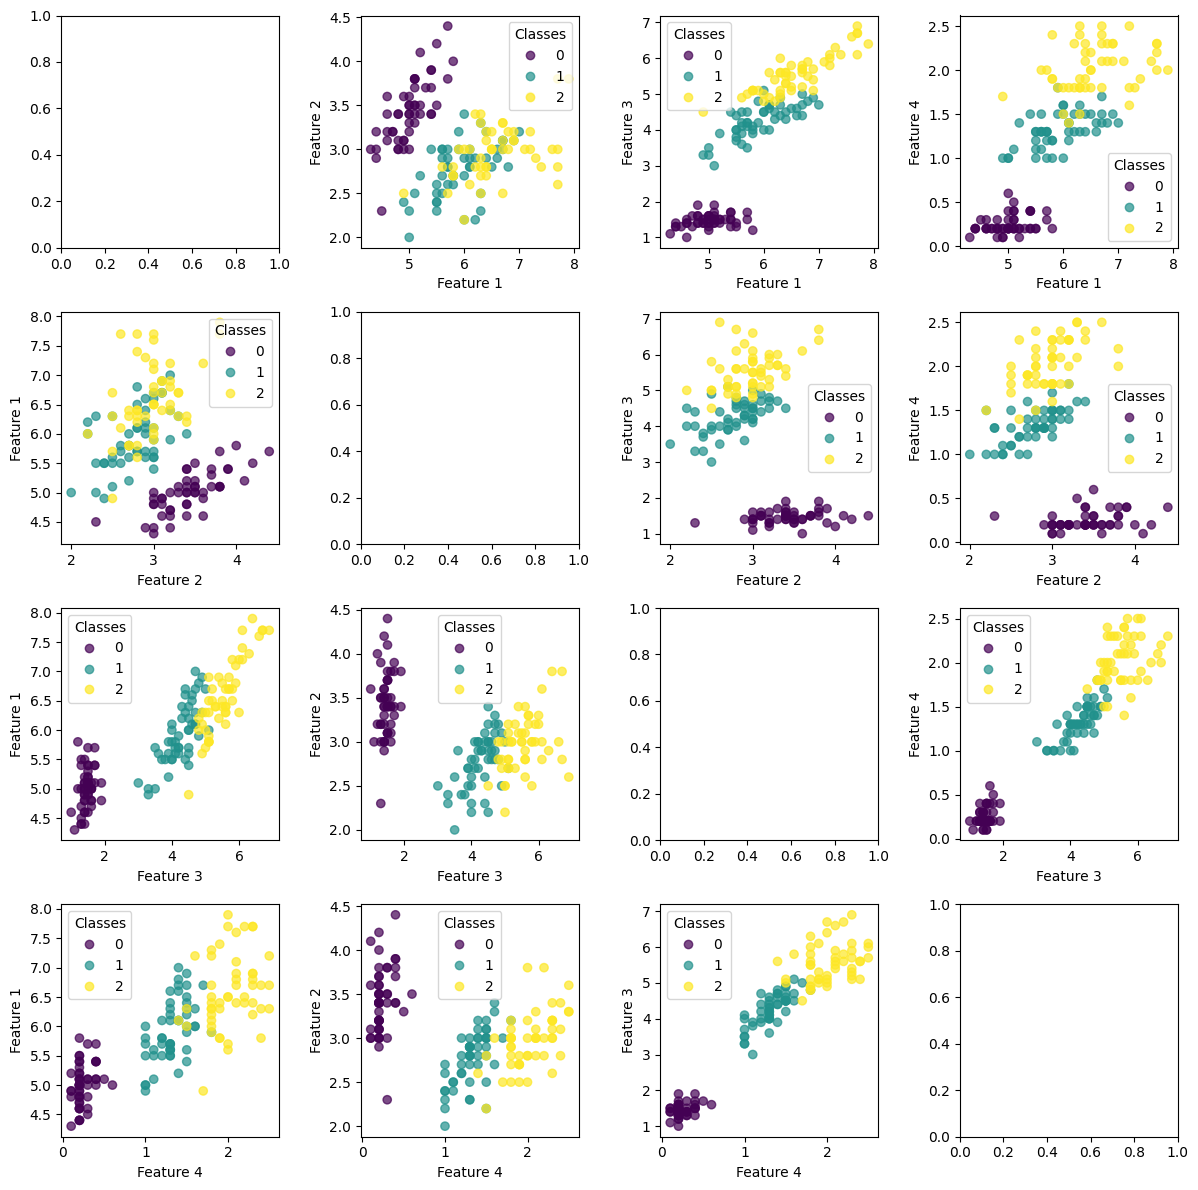

In [5]:
# Plotting the original data
plot_feature_scatter(features,target)

Plot the transformed data in both cases (1D and 2D).

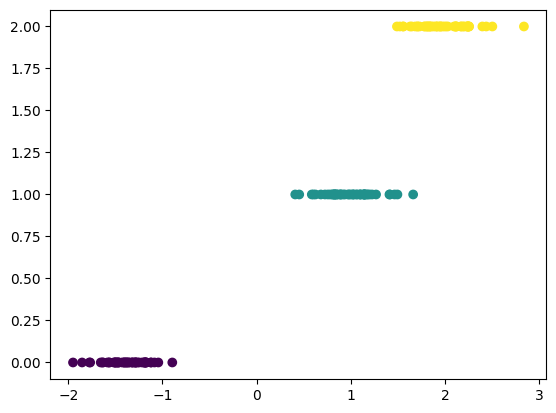

In [6]:
# Plotting the transformed 1D data
scatter = plt.scatter(one_dimension,target,c=target)
plt.show()

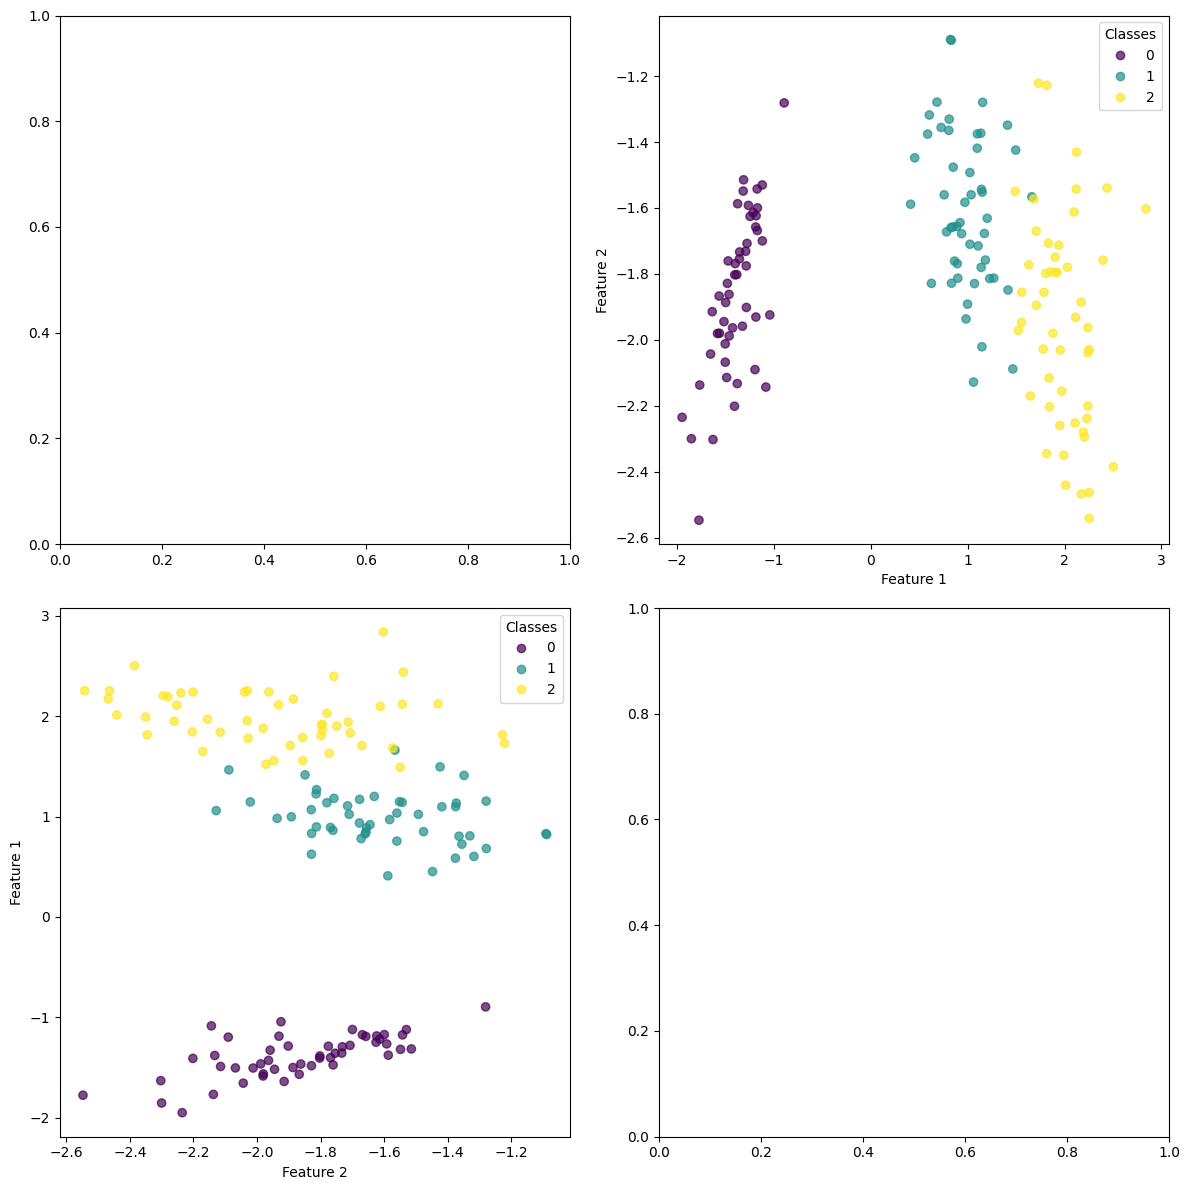

In [7]:
# Plotting the transformed 2D data
plot_feature_scatter(two_dimension,target)

Comment on the results:\
After a thorough comparison of the three plots, it can be concluded that transforming the data into 2D is adequate for a slight separation between the three classes. Meanwhile, a basic 1D data transformation is sufficient to distinguish one class (class 0) from the others. Additionally, specific features in the original data, such as the relationship between feature1 and feature4, exhibit the capability to mildly differentiate class 0 from the remaining classes.

4. Compare the 2D reduced data using LDA with your 2D reduced data using PCA (in the previous assignment).\
What differences do you notice? Does it make sense regarding the definitions of PCA and LDA?

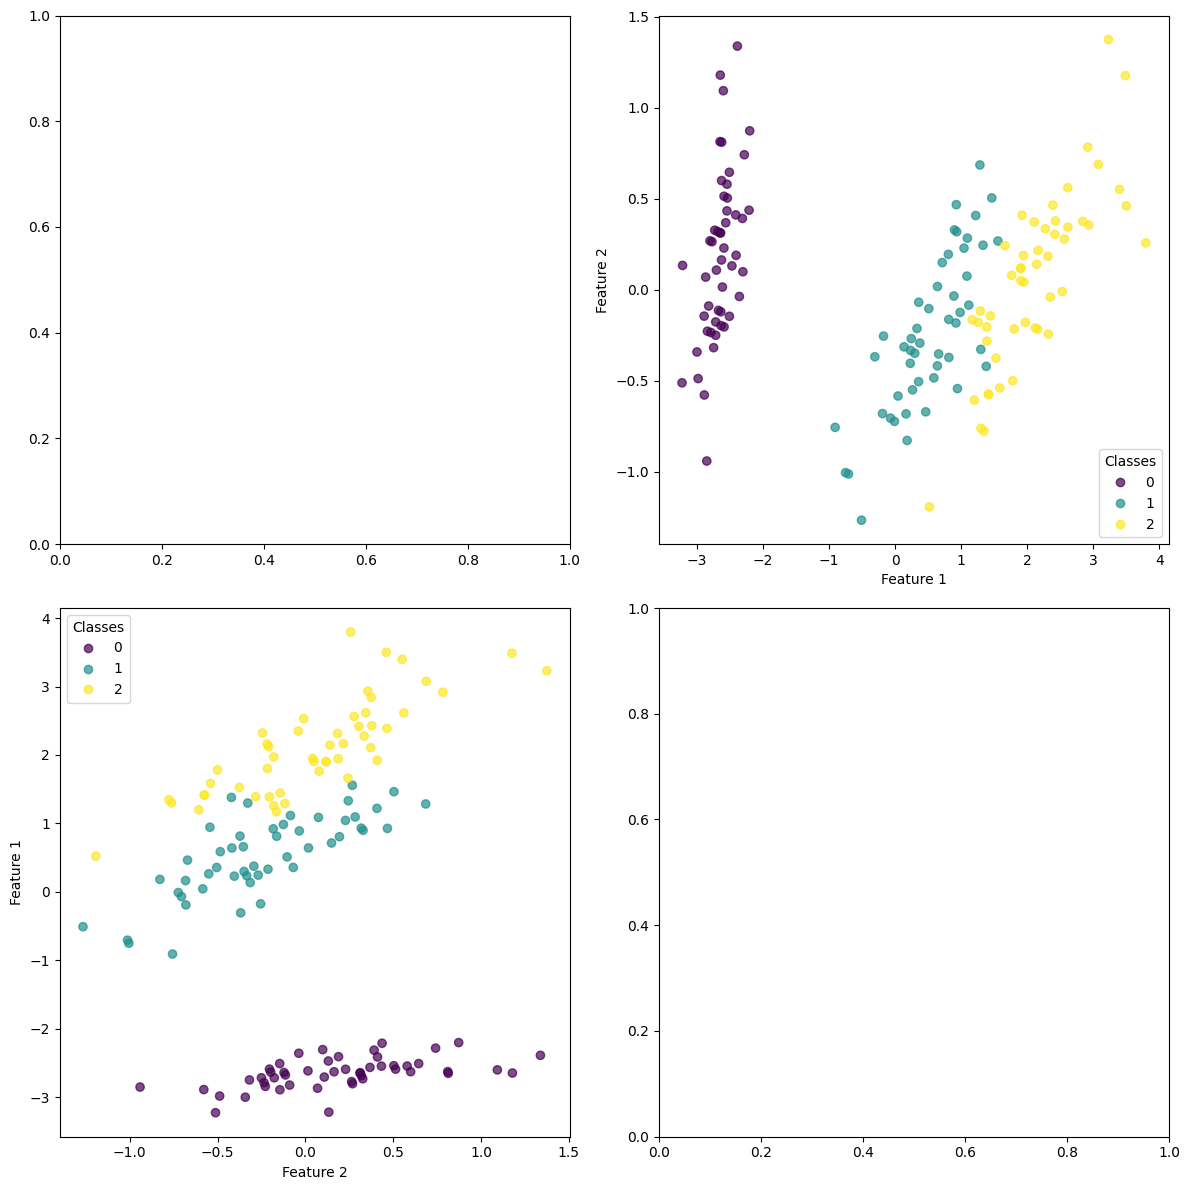

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_2d = pca.fit_transform(features,target)
plot_feature_scatter(pca_2d,target)

After a thorough examination of the plots produced by PCA and LDA, it is evident that the two displays exhibit strikingly similar patterns, with no observable distinctions between them.

**Principal Component Analysis (PCA):**

* Emphasizes the capture of overall data variance, dispersing data points to maximize coverage.
* Shapes the distribution of points in an oval pattern, lacking distinct separations between classes.

**Linear Discriminant Analysis (LDA):**

* Prioritizes the identification of directions that effectively differentiate between various classes in the data.
* Results in more closely clustered points within each class, accompanied by a greater separation between the classes.

These findings align with the fundamental principles underlying PCA and LDA.